Install fastai and read all results files as input

In [2]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

#hide
from fastbook import *
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
from fastai.tabular.all import *
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from IPython.display import Image, display_svg, SVG

pd.options.display.max_rows = 20
pd.options.display.max_columns = 8
LDA1_ES = pd.read_csv('data/res/LDA1_ES.csv', low_memory=False)
LDA1_VS = pd.read_csv('data/res/LDA1-TFIDF_VS.csv', low_memory=False)
LDA10_ES = pd.read_csv('data/res/LDA10_ES.csv', low_memory=False)
LDA10_CONTEXT_ES = pd.read_csv('data/res/LDA10_Context_ES.csv', low_memory=False)
LDA1_CONTEXT_ES = pd.read_csv('data/res/LDA1_Context_ES.csv', low_memory=False)
LDA10_CONTEXT_VS = pd.read_csv('data/res/LDA10_Context_VS.csv', low_memory=False)
LDA1_CONTEXT_VS = pd.read_csv('data/res/LDA1_Context_VS.csv', low_memory=False)
LDA10_VS = pd.read_csv('data/res/LDA10_VS.csv', low_memory=False)
SPOILER_VS = pd.read_csv('data/res/SPOILER_VS.csv', low_memory=False)
SPOILER_ES = pd.read_csv('data/res/SPOILER_ES.csv', low_memory=False)
SPOILERNET = pd.read_csv('data/res/SPOILERNET_ALL.csv', low_memory=False)
SPOILERNET_CONTEXT = pd.read_csv('data/res/fastai_context.csv', low_memory=False)
BASELINE = pd.read_csv('data/res/BASELINE-LDA1_VS.csv', low_memory=False)

In [24]:
df = SPOILER_VS.copy()
df['partitition'] = BASELINE["partitition"].values

dep_var = 'spoiler'


df['lda1-vs'] = LDA1_VS['sim'].values
df['lda1-es'] = LDA1_ES['sim'].values
df['lda1-c-es'] = LDA1_CONTEXT_ES['sim'].values
df['lda1-c_next-es'] = LDA1_CONTEXT_ES['sim_next'].values
df['lda1-c_prev-es'] = LDA1_CONTEXT_ES['sim_prev'].values
df['lda1-c-vs'] = LDA1_CONTEXT_VS['sim'].values
df['lda1-c_next-vs'] = LDA1_CONTEXT_VS['sim_next'].values
df['lda1-c_prev-vs'] = LDA1_CONTEXT_VS['sim_prev'].values


df['lda10_clsp-vs'] = LDA10_VS['cl_spind'].values
df['lda10_clns-vs'] = LDA10_VS['cl_nsind'].values
df['lda10_gn-vs'] = LDA10_VS['gn_spind'].values
df['lda10_clsp-es'] = LDA10_ES['cl_spind'].values
df['lda10_clns-es'] = LDA10_ES['cl_nsind'].values
df['lda10_gn-es'] = LDA10_ES['gn_spind'].values
df['lda10-c_clsp-es'] = LDA10_CONTEXT_ES['cl_spind'].values
df['lda10-c_clns-es'] = LDA10_CONTEXT_ES['cl_nsind'].values
df['lda10-c_gn-es'] = LDA10_CONTEXT_ES['gn_spind'].values
df['lda10-c_clsp_next-es'] = LDA10_CONTEXT_ES['cl_spind'].values
df['lda10-c_clns_next-es'] = LDA10_CONTEXT_ES['cl_nsind'].values
df['lda10-c_gn_next-es'] = LDA10_CONTEXT_ES['gn_spind'].values
df['lda10-c_clsp_prev-es'] = LDA10_CONTEXT_ES['cl_spind'].values
df['lda10-c_clns_prev-es'] = LDA10_CONTEXT_ES['cl_nsind'].values
df['lda10-c_gn_prev-es'] = LDA10_CONTEXT_ES['gn_spind'].values
df['lda10-c_clsp-vs'] = LDA10_CONTEXT_VS['cl_spind'].values
df['lda10-c_clns-vs'] = LDA10_CONTEXT_VS['cl_nsind'].values
df['lda10-c_gn-vs'] = LDA10_CONTEXT_VS['gn_spind'].values
df['lda10-c_clsp_next-vs'] = LDA10_CONTEXT_VS['cl_spind'].values
df['lda10-c_clns_next-vs'] = LDA10_CONTEXT_VS['cl_nsind'].values
df['lda10-c_gn_next-vs'] = LDA10_CONTEXT_VS['gn_spind'].values
df['lda10-c_clsp_prev-vs'] = LDA10_CONTEXT_VS['cl_spind'].values
df['lda10-c_clns_prev-vs'] = LDA10_CONTEXT_VS['cl_nsind'].values
df['lda10-c_gn_prev-vs'] = LDA10_CONTEXT_VS['gn_spind'].values

df['spoilernet'] = SPOILERNET['spoilernet'].values
df['spoilernet_next'] = SPOILERNET_CONTEXT['next_sent'].values
df['spoilernet_prev'] = SPOILERNET_CONTEXT['prev_sent'].values

df['tfidf'] = LDA1_ES['tfidf'].values
df['book_bias'] = BASELINE['book_bias']
df['user_bias'] = BASELINE['user_bias']
df['position'] = BASELINE['position']

df['sent'] = LDA10_VS['sent'].values
df['bookID'] = LDA10_VS['bookID'].values

procs = [Categorify, FillMissing]

condt = df.partitition=='TRN'
condv = df.partitition=='VAL'
condtt = df.partitition=='TST'
train_idx = np.where(condt)[0]
valid_idx = np.where(condv)[0]
test_idx = np.where(condtt)[0]
tdf = df.iloc[test_idx]

splits = (list(train_idx),list(valid_idx))

Decide which corpus to use (edited =es, vanilla = vs) and which system to test (list cont contains all variables)

In [14]:
cs = "es"

if cs != "es":
    df[dep_var] = SPOILER_VS[dep_var].astype('category')
else:
    df[dep_var] = LDA10_ES[dep_var].astype('category')

cont,cat = cont_cat_split(df, 1, dep_var=dep_var)
#f'lda1-c_prev-{cs}',f'lda1-c_next-{cs}',f'lda1-c-{cs}'
#'spoilernet', 'spoilernet_next', 'spoilernet_prev'
#f'lda1-{cs}', f'lda10_clsp-{cs}', f'lda10_clns-{cs}', f'lda10_gn-{cs}'
#f'lda1-{cs}', f'lda10-c_clsp-{cs}', f'lda10-c_clns-{cs}', f'lda10-c_gn-{cs}', 
#f'lda10-c_clsp_next-{cs}', f'lda10-c_clns_next-{cs}', f'lda10-c_gn_next-{cs}', f'lda10-c_clsp_prev-{cs}', f'lda10-c_clns_prev-{cs}', f'lda10-c_gn_prev-{cs}', 
#'tfidf', 'book_bias', 'user_bias', 'position'
cont =['tfidf', 'book_bias', 'user_bias', 'position', 'spoilernet', 'spoilernet_next', 'spoilernet_prev']
cat = []
cont, cat, len(tdf)

(['tfidf',
  'book_bias',
  'user_bias',
  'position',
  'spoilernet',
  'spoilernet_next',
  'spoilernet_prev'],
 [],
 38197)

Create DataLoader and Class Weights

In [15]:
to = TabularPandas(df, procs, cat, cont, y_names=dep_var, splits=splits)
xs,y = to.train.xs,to.train.y
valid_xs,valid_y = to.valid.xs,to.valid.y
dls = to.dataloaders(1024)
len(to.train),len(to.valid)

(265074, 73060)

In [16]:
class_count_df = df.iloc[:].groupby(dep_var).count()

n_0, n_1 = class_count_df.iloc[0, 0], class_count_df.iloc[1, 0]

w_0 = (n_0 + n_1) / (2.0 * n_0)
w_1 = (n_0 + n_1) / (2.0 * n_1)

# Important: Convert Weights To Float Tensor
class_weights=torch.FloatTensor([w_0, w_1])
class_weights

tensor([ 0.5255, 10.2901])

Find best learning rate

SuggestedLRs(valley=0.0012022644514217973)

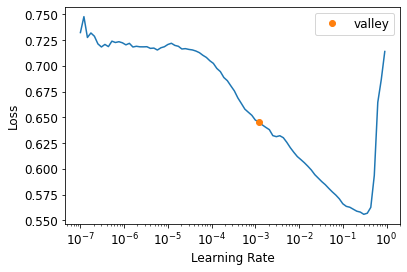

In [17]:
roc = RocAucBinary()
loss_func = CrossEntropyLossFlat(weight=class_weights) #
learn = tabular_learner(dls, loss_func=loss_func, metrics=roc)

learn.lr_find()

Train model in 10 epochs

In [18]:
learn.fit_one_cycle(10,0.0012022644514217973)

epoch,train_loss,valid_loss,roc_auc_score,time
0,0.469690,0.469604,0.881681,00:03
1,0.426570,0.409884,0.893503,00:04
2,0.414312,0.406094,0.893388,00:04
3,0.411388,0.408632,0.890813,00:03
4,0.404824,0.402590,0.894031,00:04
5,0.407604,0.405744,0.894144,00:03
6,0.409857,0.408495,0.892594,00:03
7,0.398652,0.404742,0.892971,00:03
8,0.403491,0.404674,0.893089,00:04
9,0.407724,0.402662,0.893273,00:04


Create test batch and predict it, measure result score and (optional) store results in file

In [19]:
dl = learn.dls.test_dl(tdf, bs=1024) # apply transforms
preds,  _ = learn.get_preds(dl=dl) # get prediction
trues = []
npreds = []
sents = []
for i in range(len(preds)):
    npreds.append(preds[i][1].item())
    trues.append(tdf[dep_var].values[i])
len(trues), len(preds), len(sents), npreds[0]

(38197, 38197, 0, 0.006385476794093847)

In [20]:
from sklearn.metrics import roc_auc_score
roc_auc_score(trues, npreds)

0.8781309166870636

In [13]:
df_to_sort = pd.DataFrame({"sent":tdf.sent.values, "spoiler":trues, "lda":npreds})
#df_to_sort.to_csv("results.csv")

In [25]:
df_to_sort['bookID'] = tdf.bookID.values

In [26]:
df_to_sort.to_csv("results.csv")